# How increasing the amount of training data for a machine learning algorithm that recognizes handwritten digits increases the accuracy of the algorithm.

## By Harshith Renukaprasad

Machine learning is the scientific study of algorithms ancd statistical models that computers use to perform a specific task without a human explicitly asking it to do so. Practically, this means giving the computer a training set of images for the computer to learn the difference between a 3 and an 8 for example, and then give the image an image of a 3 it has not seen before and predict what number it is based on what it has learnt. 

The **Goal of the project is to progressively increase the amount of training images available to the computer from  100 to 50,000 and document the increased accuracy and decreased loss of the algorithm.**

Materials required for the project:

Disclaimer: Most of the materials included are digital.

Another Disclaimer: This project was done on Visual Studio Code, but is submitted/presented in Jupyter notebook for the users ease in readablity.

1. The first and foremost thing required for this project is a computer with  [Visual Studio Code ](https://code.visualstudio.com/download) (200  megabytes, Windows 64 bit) installed. Note that the computer needs to  have atleast 1 gigabyte of ram and 5 gigabytes of storage available. The computer, very importantly, also requires a stable internet connection. Finally, [Python 3.7.6](https://www.python.org/ftp/python/3.7.6/python-3.7.6-amd64.exe) (downloaded, and added to path throught the installer)needs to be installed on the system


2. A google account to login to the websites [Hackerrank](https://www.hackerrank.com/), and [Youtube](https://www.youtube.com/channel/UCCezIgC97PvUuR4_gbFUs5g). Hackerrank is a very popular website used to practice python, since this whole project is written using the language Python (version 3.7.6). Youtube is required to actually learn the language and the hyperlink on the word "Youtube" earlier links to a channel called Corey Schafer, from which all the learning for python, and its various packages were done.


3. Speaking of packages, the there are only 4 packages required for this project which are Keras, Sklearn, pandas, matplotlib and finally tensorflow. All of these can be installed by opening up Visual Studio Code, opening a new terminal by clicking on terminal on the top taskbar, and typing in "pip install keras", wait for it to install, "pip install sklearn", waiting for Sklearn to install, and finally "pip install tensorflow", and allow tensorflow(make sure version 2.1.0 is installing) to finish installing. Pandas and Matplotlib can be installed using the same "pip install " command. Do the same with  Note that the full extent of some packages are not used, rather a parts of it or "Modules" are used.


4. A lot of time, around 100 to 120 hours of work are required to finish the project. 60 hours are required to learn python, 20 to learn about machine learning and another 20 hours to actually code. This may take longer or shorter depending on the amount of coding/python known. 


5. A website known as [Markdown Tables gererator](https://www.tablesgenerator.com/markdown_tables) which allows for the data table of this project to be created and embedded into the markdown cells(text cells instead of code cells) with ease.


6. Also, this project has a link further on to the mnist database of handwritten numbers, but that is just for ease of access, as keras has a module through which mnist can be imported.


Safety precautions or Collection Concerns: None

The data from the final iteration of the project is collected using an algorithm in the algorithm. Akin to a data collection journal, the program has an initialized dictionary, or a set of values that are updated for each data set(For example 1000 images, or 2000 images  for training). Each data set is like a different entry into the dictionary, with its own results. The algorithm/formula uses a for loop to test each data set and at the end, the results are appended into the dictionary. This ensures that no data is lost, and everything is collected.

## Procedure

**Important!: The procedure details the actual coding part of the project, assuming that the reader already knows python and has installed all of the packages necessary.**

## Step 1: import all the necessary packages and modules

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


This may seem like a lot, but it's actually not. Using just 3 packages, keras(Tensorflow is used by keras, and so it is neccessary to install tensorflow) pandas, sklearn, all the modules and everything needed for this project is imported. The main things to take not of from keras are mnist, and conv2d. [Mnist](http://yann.lecun.com/exdb/mnist/) is the database from which the labeled numerical digits are imported. Conv2d is just a module which helps to build a convolutional neural network(Refer to the image below). From sklearn, the main module to be noted is train_test_split, which allows us to vary the amount of training data. Pandas and matplotlib are used for data plotting and making a data table internally.

Image of a convolutional neural network:

![Image of a convolutional neural network](https://cdn-images-1.medium.com/fit/t/1600/480/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

## Step 2: Write a function to load the MNIST database into training and testing variables.

In [2]:
def load_mnist_data(test_size_per):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(x_train.shape, y_train.shape)
    x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train, test_size=test_size_per)
    print(x_train.shape)
    return x_train, y_train, x_test, y_test 

Now to get into the actual coding bit of the project. This is one of 3 functions in this project. The name of it being "load_minst_data". This does exactly what the name suggests and loads the variables with training and test data. The variables being x_train, y_train, x_test, and y_test. x and y are not coordinates, but rather x is the input and y is the output. The training variables, x_train, and  y_train are where all the training images that the computer uses to learn are kept. While x_test, and y_test are where the testing images are kept. These images are what the computer tests itself on to refine the algorithm. There are 60,000 images in the mnist database and by default, 50,000 are kept for training and the remaining 10,000 are used as testing images. on the 4th and 5th lines of the cell, the function train_test_split() is used to split the data into training and testing images by taking a percentage value which is then applied to the database and made into the test set. For example, if the percentage is given as 0.5 or 50%, 30,000 images would be used as testing and 30,000 for training. This is not a set value however, there is a parameter known as test_size_per which allows the percentage to be changed every time the function is called upon.

The following image shows a sample image from the mnist database.

![Handwritten 8 in the MNIST database](https://miro.medium.com/max/490/1*nlfLUgHUEj5vW7WVJpxY-g.png)

Notice that the image is graphed and has a size of 28  x 28

## Step 3: Write a function to reshape, and prepare all the images uniformly for input into the algorithm.

In [3]:
def prepare_input(x_train, y_train, x_test, y_test):
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    return x_train, y_train, x_test, y_test

This is one of the most important parts of the whole algorithm, second only to the actual machine learning part itself. All the images are now reshaped into 28 x 28, just in case some of them were not that size. Furthermore, this uniformity allows the computer to look at all of the images consistently the same. Furthermore, all the images are shuffled, so that certain patterns and exclusions of digits do not occur, therefore removing the chance that the computer's "learning" is skewed. In summation, this function allows for the uniformity of the images so that the computer sees every image equally and is not skewed by unnatural patterns such as the abscence of a certain digit.

## Step 4: Writing a function to setup the model, train the model, and save the model.

In [4]:
def setup_model(x_train, y_train, x_test, y_test ):
    batch_size = 128
    num_classes = 10
    epochs = 10

    input_shape = (28, 28, 1)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

    hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
    print("The model has successfully trained")

    score = model.evaluate(x_test, y_test, verbose=0)
    

    model.save('mnist.h5')
    print("Saving the model as mnist.h5")

    return score

This function is what sets up a model(convolutional neural network), and trains it with the training set. This is still a function, and is not executing anything, so no output is given. The way a machine learning model learns/trains itself is that it uses differential calculus. Bascially, an inverse parabola is graphed internally, called the gradient descent that allows the computer to see where it is. The x axis is the answer that it is guessing. For example, an eight is given as an input, and the computer guesses that it's a 5. Now, that is the wrong answer, but atleast the computer now knows that the eight is not a 5. The y axis is the cost. Basically the higher the cost, the farther the model is from the answer. Graphing this would show an inverse parabola, where the answer(the number eight in the example) on the x axis, and the lowest value on the y axis(the cost) are located. The end goal of the model is to reach that low point. once it does, and it gets a problem correct, it moves on and uses the same formula that it used for the previous one. Basically, the computer at first uses random values, and then narrows it down to the correct value, and uses the formula that got it the correct values. This is all calculated in a matter of mere seconds though. This is why a larger training set, like common sense would tell us, makes the computer more accurate in its learning and testing. Below is an image of the gradient descent.  

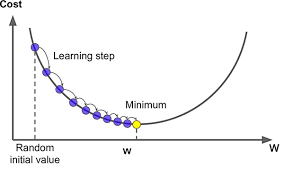

## Step 6: Executing the functions in a for loop, so that each iteration, a bigger training set is used

In [5]:
summary_values = {}

#Takes increasingly more images to increase the accuracy
training_sets = [50, 100, 200, 500, 750, 1500, 2000, 5000, 6000, 8000, 10000]
j = 0
column_names = ["Amount of Training images", "Accuracy"]
df = pd.DataFrame(columns = column_names, index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

for test_per in training_sets:
    training_per = 1- (test_per/60000) #calculation is giving the test percentage
    print(training_per)
    x_train, y_train, x_test, y_test = load_mnist_data(training_per)
    print('Testing with train set size of: ', x_train.shape)
    x_train, y_train, x_test, y_test = prepare_input(x_train, y_train, x_test, y_test)
    score = setup_model(x_train, y_train, x_test, y_test)
    summary_values[x_train.shape] = {test_per/100, score[0], score[1]}
    i = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    new_data_list = [test_per, score[1]]
    df.loc[i[j]] = new_data_list
    j += 1


print(summary_values)

0.9991666666666666
(60000, 28, 28) (60000,)
(50, 28, 28)
Testing with train set size of:  (50, 28, 28)
x_train shape: (50, 28, 28, 1)
50 train samples
59950 test samples
Train on 50 samples, validate on 59950 samples
Epoch 1/10
50/50 [==============================] - 13s 265ms/step - loss: 2.3215 - accuracy: 0.0600 - val_loss: 2.2866 - val_accuracy: 0.1443
Epoch 2/10
50/50 [==============================] - 11s 223ms/step - loss: 2.2901 - accuracy: 0.1000 - val_loss: 2.2736 - val_accuracy: 0.1969
Epoch 3/10
50/50 [==============================] - 10s 210ms/step - loss: 2.2614 - accuracy: 0.1800 - val_loss: 2.2691 - val_accuracy: 0.1252
Epoch 4/10
50/50 [==============================] - 11s 214ms/step - loss: 2.2239 - accuracy: 0.1400 - val_loss: 2.2404 - val_accuracy: 0.1418
Epoch 5/10
50/50 [==============================] - 12s 244ms/step - loss: 2.1662 - accuracy: 0.2200 - val_loss: 2.2253 - val_accuracy: 0.1403
Epoch 6/10
50/50 [==============================] - 11s 225ms/step -

750/750 [==============================] - 17s 23ms/step - loss: 0.7886 - accuracy: 0.7467 - val_loss: 0.5940 - val_accuracy: 0.8268
Epoch 9/10
750/750 [==============================] - 15s 21ms/step - loss: 0.7007 - accuracy: 0.7627 - val_loss: 0.4158 - val_accuracy: 0.8583
Epoch 10/10
750/750 [==============================] - 15s 20ms/step - loss: 0.5899 - accuracy: 0.8080 - val_loss: 0.3802 - val_accuracy: 0.8948
The model has successfully trained
Saving the model as mnist.h5
0.975
(60000, 28, 28) (60000,)
(1500, 28, 28)
Testing with train set size of:  (1500, 28, 28)
x_train shape: (1500, 28, 28, 1)
1500 train samples
58500 test samples
Train on 1500 samples, validate on 58500 samples
Epoch 1/10
1500/1500 [==============================] - 15s 10ms/step - loss: 2.2072 - accuracy: 0.1947 - val_loss: 1.9013 - val_accuracy: 0.3732
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 1.7544 - accuracy: 0.4007 - val_loss: 1.0606 - val_accuracy: 0.6775
Epoch 3/1

8000/8000 [==============================] - 17s 2ms/step - loss: 0.1987 - accuracy: 0.9442 - val_loss: 0.1045 - val_accuracy: 0.9679
Epoch 5/10
8000/8000 [==============================] - 16s 2ms/step - loss: 0.1635 - accuracy: 0.9559 - val_loss: 0.0859 - val_accuracy: 0.9746
Epoch 6/10
8000/8000 [==============================] - 17s 2ms/step - loss: 0.1360 - accuracy: 0.9600 - val_loss: 0.0926 - val_accuracy: 0.9728
Epoch 7/10
8000/8000 [==============================] - 17s 2ms/step - loss: 0.1165 - accuracy: 0.9675 - val_loss: 0.0904 - val_accuracy: 0.9741
Epoch 8/10
8000/8000 [==============================] - 17s 2ms/step - loss: 0.1067 - accuracy: 0.9710 - val_loss: 0.0775 - val_accuracy: 0.9783
Epoch 9/10
8000/8000 [==============================] - 17s 2ms/step - loss: 0.0933 - accuracy: 0.9736 - val_loss: 0.0758 - val_accuracy: 0.9778
Epoch 10/10
8000/8000 [==============================] - 18s 2ms/step - loss: 0.0809 - accuracy: 0.9772 - val_loss: 0.0721 - val_accuracy: 0.

This is the final step for this project and does not involve much. The three main things that are part of this step are the variables summary_values, training_sets and the for loop. The variable summary_values is a dictionary variable that allows for the ending data for each training size to be collected and stored safely. This variable is printed at the end to allow for easy data collection. The variable training_sets is used in conjunction with the for loop to iterate through each amount of training images. The variable test_per is being iterated with each value in the array training_sets and is converted into a percentage to be put into the function load_mnist_data and specify what percent of the images are training. The results of the project are displayed above and the data table and graphs are made and printed down below

## Data Table:

In [6]:
print(df)

   Amount of Training images  Accuracy
1                         50  0.314662
2                        100  0.243756
3                        200  0.505552
4                        500  0.817328
5                        750  0.894835
6                       1500  0.950444
7                       2000  0.952603
8                       5000  0.974582
9                       6000  0.976426
10                      8000  0.980135
11                     10000   0.98188


## Graph:

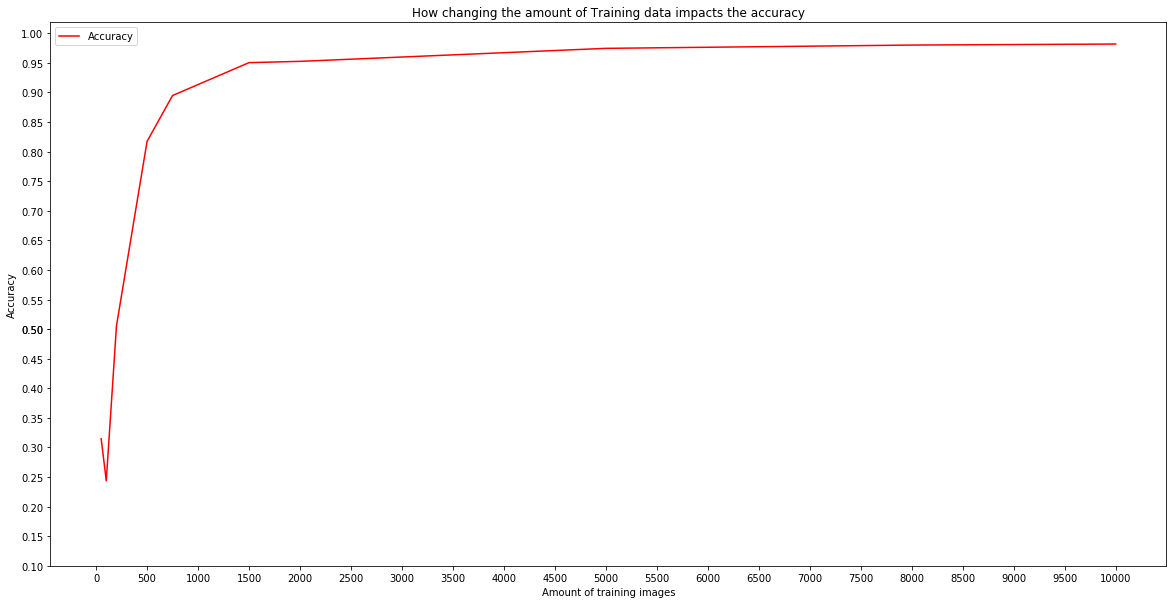

In [12]:
#Line Graph
line_graph = df.plot(kind='line',x='Amount of Training images',y='Accuracy',color='red',  xticks=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000], 
        yticks=[0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00], figsize=(20,10))
line_graph.set(title="How changing the amount of Training data impacts the accuracy", xlabel="Amount of training images", ylabel="Accuracy")
plt.show()


## Conclusion

This project was a very interesting project overall. The big takeaways from this project were that the more training data that a machine learning algorithm is provided with, the higher the accuracy is. Machine learning algorithms are also highly sensitive to patterns and at any moment a slight pattern emerges, the algorithm shifts to accomodate that pattern. The hypothesis was also proven right with the results showing a drastic, and highly noticeable difference between the first training set of 100, and the last training set of 50,000, which got to 99% accuracy. All of this serves to quantify the notion that machines need a lot of examples and time to to learn/understand what they are looking at, and apply that to test images. The first training sets had very low accuracy, and this was because it was being tested on something it might not even have seen.

## Future Applications

This project is just a stepping stone into the world of machine leearning. Machine learning and artificial intelligence have huge applications in the future, allowing for humans to take a backseat in  the world and allow computers to do more and more things for us. Machine learning works extremely similarly to a human brain. Neural networks are just very, very small simulations of actual neurons in the brain. This project used just one kind of neural network, a convolutional neural network. However, there are a lot of differing kinds of neural networks that allow for increasingly complicated and better implementations of artificial intelligence for purposes as varied as facial recognition and YouTube ads.

## Link for the same project but in Visual studio code for ease of copying and pasting:

https://github.com/Harshith0307/Machine_Learning/blob/master/minst_handwriting.py

You can copy and paste this into Visual Studio Code, and if all the packages are installed, it will work.

##  Bibliography for all of the information used in this project:

Numerical analysis. (2020). In Encyclopædia Britannica. Retrieved from https://school.eb.com/levels/high/article/numerical-analysis/108506#

Published in Encyclopedia Britannica, this article discusses numerical analysis and all its applications. The main focus of this article is numerical analysis’ use in computer science and data science applications. This details numerical regressions and algorithms that are regularly used to find correlations within data sets and serve as a basis for almost all machine learning algorithms.

Encyclopedia Britannica, the publisher of the article, is a British encyclopedia publisher that has long been renowned for having extremely neutral and unbiased content. Britannica has been publishing since 1768 and is a reliable source of information for research purposes.





Understanding How Python is Used in Data Science. (n.d.). Retrieved January 25, 2020, from https://www.datasciencegraduateprograms.com/python/ 

Published on Data Science Graduate Programs, this article discusses the uses of Python within the realm of data science. Python is an object-oriented programming language that is used in data science for its versatility, and ease of operating with additional libraries for an overall very simple approach to data science and machine learning. This article outlines the uses of Python in Data Science and how python efficiently and effectively fulfills that goal.

Data Science Graduate Programs is a California based website staffed by professors in California. It serves as a website to get high school graduates into college for data science and outlines the positives of the data science career. It is a reliable and unbiased source and has been publishing since 2011.





Brownlee, Jason. (2019, August 9). Introduction to Matrices and Matrix Arithmetic for Machine Learning. Retrieved February 2, 2020, from https://machinelearningmastery.com/introduction-matrices-machine-learning/

Matrices are a fundamental element in linear algebra. They are used widely in the realm of machine learning especially in the input data variable(x) to train the algorithm. A matrix is at its lowest complexity, an array within an array with columns and rows. Matrices can be used in arithmetic operations as well and have been made greatly easier by python libraries such as pandas, and NumPy.

Jason Brownlee Ph.D. is a professional python developer and machine learning practitioner. He started writing a series of articles about machine learning with python because he wants to get new developers started in machine learning and get them good fast. 





General Python FAQ¶. (n.d.). Retrieved January 25, 2020, from https://docs.python.org/2/faq/general.html#what-is-python 

Python is an object-oriented language. It is a high-level programming language that incorporates a large number of modules, libraries, classes and has a lot of the features that make other programming languages like C, C#, and Java popular. Python is also a portable programming language like Java and can be used on almost all kinds of software.

Python.org is a nonprofit website created to house the python documentation, its source code, and other frequently asked questions about python. It also has sections written by and sections with interviews with the original creator of python, Guido Van Rossum.





Dataman. (2019, November 20). What Is Image Recognition? Retrieved February 2, 2020, from https://towardsdatascience.com/module-6-image-recognition-for-insurance-claim-handling-part-i-a338d16c9de0

Image recognition is exactly what it sounds like. It is the recognition of images. The human brain makes this really easy, but computers, on the other hand, don’t have the intuition that humans have to recognize and evaluate images. There are 4 steps that are required to teach computers how to recognize images. First, all images are made up of pixels and you need to extract them from the image. Secondly, classify those pixels into labeled data sets. Thirdly, the hardest step, train the machine to be able to recognize images. lastly, Predict a new image that classifies under one of the categories. 

Towards Data Science us an online journal about machine learning, and artificial intelligence written by a variety of authors who are experts in the topic. They strive to provide well written and informative articles that their audience wants to read. 





About pandas. (n.d.). Retrieved February 2, 2020, from https://pandas.pydata.org/about/index.html

Pandas is a language library written for the Python programming language. It is mainly a data science library with many applications for machine learning and artificial intelligence. Pandas mainly deals with matrices and large data sets. Pandas is also open source so any developer can suit it to his or her needs.

Pandas aims to be the fundamental high-level building block for doing practical data analysis in Python. Additionally, it has the broader goal of becoming a powerful and flexible open-source data analysis/manipulation tool available in any language.




Saha, S. (2018, December 17). A Comprehensive Guide to Convolutional Neural Networks - the ELI5 way. Retrieved March 17, 2020, from https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

The image of the convolutional neural network at the top of the article is used.




Yal, O. G. (2020, March 4). Image Classification in 10 Minutes with MNIST Dataset. Retrieved March 17, 2020, from https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

An image of the mnist database from the article is used to illustrate how the database's images look





Bhattarai, S. (2018, September 4). What is Gradient Descent in machine learning? Retrieved March 17, 2020, from https://saugatbhattarai.com.np/what-is-gradient-descent-in-machine-learning/

An image of gradiel descent is used from the article.